In [1]:
import numpy as np 
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt 
color = sns.color_palette()

import subprocess
from subprocess import check_output
import gc 
%matplotlib inline 

In [2]:
files = check_output(["ls", "Data/"]).decode("utf8")
print(files)

holidays_events.csv
items.csv
oil.csv
sample_submission.csv
stores.csv
test.csv
train.csv
transactions.csv



In [6]:
for file in files.split("\n"):
    path = "Data/" + file
    try:
        with open(path, 'r') as f:
            lines = f.readlines()
        print("The file: ", file, "has: ", len(lines), "rows")
    except:
        print("The file: ", file, "was not found.")

The file:  holidays_events.csv has:  351 rows
The file:  items.csv has:  4101 rows
The file:  oil.csv has:  1219 rows
The file:  sample_submission.csv has:  3370465 rows
The file:  stores.csv has:  55 rows
The file:  test.csv has:  3370465 rows
The file:  train.csv has:  125497041 rows
The file:  transactions.csv has:  83489 rows
The file:   was not found.


In [7]:
Dir = "Data"
test = pd.read_csv(f"{Dir}/test.csv")
stores = pd.read_csv(f"{Dir}/stores.csv")
items = pd.read_csv(f"{Dir}/items.csv")
trans = pd.read_csv(f"{Dir}/transactions.csv")
oil = pd.read_csv(f"{Dir}/oil.csv")
holiday = pd.read_csv(f"{Dir}/holidays_events.csv")
print("done")

done


In [8]:
mem_test = test.memory_usage(index=True).sum()
print("Dataset uses: ",mem_test/1024**2," MB")
print(test.info(memory_usage="deep"))

Dataset uses:  106.07284545898438  MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3370464 entries, 0 to 3370463
Data columns (total 5 columns):
 #   Column       Dtype 
---  ------       ----- 
 0   id           int64 
 1   date         object
 2   store_nbr    int64 
 3   item_nbr     int64 
 4   onpromotion  bool  
dtypes: bool(1), int64(3), object(1)
memory usage: 295.7 MB
None


In [9]:
test['store_nbr'] = test['store_nbr'].astype(np.uint8)
test['id'] = test['id'].astype(np.uint32)
test['item_nbr'] = test['item_nbr'].astype(np.uint32)
test['date'] = pd.to_datetime(test['date'], format="%Y-%m-%d")
print(test.memory_usage(index=True))
new_mem_test = test.memory_usage(index=True).sum()
print("test dataset uses ", new_mem_test / 1024**2, " MB after changes")
print("memory saved =",(mem_test-new_mem_test) / 1024**2," MB")

Index               128
id             13481856
date           26963712
store_nbr       3370464
item_nbr       13481856
onpromotion     3370464
dtype: int64
test dataset uses  57.85797119140625  MB after changes
memory saved = 48.214874267578125  MB


In [11]:
dtype_dict = {"id": np.uint32,
              "store_nbr": np.uint8,
              "item_nbr": np.uint32,
              "unit_sales": np.float16
              }

train_part1 = pd.read_csv(f"{Dir}/train.csv", nrows=100,
                          dtype=dtype_dict, usecols=[0, 2, 3, 4])
print(train_part1.describe())
print(train_part1.dtypes)


train_part2 = pd.read_csv(f"{Dir}/train.csv", nrows=10000,
                          dtype=dtype_dict, usecols=[1, 5], parse_dates=[0])
train_part2['Year'] = pd.DatetimeIndex(train_part2['date']).year
train_part2['Month'] = pd.DatetimeIndex(train_part2['date']).month
train_part2['Day'] = pd.DatetimeIndex(train_part2['date']).day.astype(np.uint8)
del (train_part2['date'])
train_part2['Day'] = train_part2['Day'].astype(np.uint8)
train_part2['Month'] = train_part2['Month'].astype(np.uint8)
train_part2['Year'] = train_part2['Year'].astype(np.uint16)

train_part2["onpromotion"].fillna(0, inplace=True)
train_part2["onpromotion"] = train_part2["onpromotion"].astype(np.int8)
print(train_part2.head())
print(train_part2.dtypes)

               id  store_nbr       item_nbr  unit_sales
count  100.000000      100.0     100.000000  100.000000
mean    49.500000       25.0  186736.120000    5.019531
std     29.011492        0.0   56520.574966   10.515625
min      0.000000       25.0  103665.000000    1.000000
25%     24.750000       25.0  128208.000000    1.000000
50%     49.500000       25.0  172263.500000    2.000000
75%     74.250000       25.0  231846.250000    5.000000
max     99.000000       25.0  275823.000000   90.000000
id             uint32
store_nbr       uint8
item_nbr       uint32
unit_sales    float16
dtype: object
   onpromotion  Year  Month  Day
0            0  2013      1    1
1            0  2013      1    1
2            0  2013      1    1
3            0  2013      1    1
4            0  2013      1    1
onpromotion      int8
Year           uint16
Month           uint8
Day             uint8
dtype: object


In [12]:
train_part2 = pd.read_csv(f"{Dir}/train.csv",
                          dtype=dtype_dict, usecols=[1, 5], parse_dates=[0])
train_part2['Year'] = pd.DatetimeIndex(train_part2['date']).year
train_part2['Month'] = pd.DatetimeIndex(train_part2['date']).month
train_part2['Day'] = pd.DatetimeIndex(train_part2['date']).day.astype(np.uint8)
del (train_part2['date'])
train_part2['Day'] = train_part2['Day'].astype(np.uint8)
train_part2['Month'] = train_part2['Month'].astype(np.uint8)
train_part2['Year'] = train_part2['Year'].astype(np.uint16)

train_part2["onpromotion"].fillna(0, inplace=True)
train_part2["onpromotion"] = train_part2["onpromotion"].astype(np.int8)
print(train_part2.head())
print(train_part2.dtypes)

C:\Users\anisr\AppData\Local\Temp\ipykernel_21316\4016694863.py:1: DtypeWarning: Columns (5) have mixed types. Specify dtype option on import or set low_memory=False.
  train_part2 = pd.read_csv(f"{Dir}/train.csv",


   onpromotion  Year  Month  Day
0            0  2013      1    1
1            0  2013      1    1
2            0  2013      1    1
3            0  2013      1    1
4            0  2013      1    1
onpromotion      int8
Year           uint16
Month           uint8
Day             uint8
dtype: object


In [13]:
dtype_dict = {"id": np.uint32,
              "store_nbr": np.uint8,
              "item_nbr": np.uint32,
              "unit_sales": np.float32
              }

train_part1 = pd.read_csv(f"{Dir}/train.csv",
                          dtype=dtype_dict, usecols=[0, 2, 3, 4])
print(train_part1.dtypes)

id             uint32
store_nbr       uint8
item_nbr       uint32
unit_sales    float32
dtype: object


In [14]:
train = pd.concat([train_part1.reset_index(drop=True), train_part2], axis=1)
del (train_part1)
del (train_part2)
id = train['id']
del (train['id'])
print(train.memory_usage())

mem_train = 5*1024**3
new_mem_train = train.memory_usage().sum()
print("Train dataset uses ", new_mem_train / 1024**2, " MB after changes")
print("memory saved is approx", (mem_train-new_mem_train) / 1024**2, " MB")

Index                128
store_nbr      125497040
item_nbr       501988160
unit_sales     501988160
onpromotion    125497040
Year           250994080
Month          125497040
Day            125497040
dtype: int64
Train dataset uses  1675.5663757324219  MB after changes
memory saved is approx 3444.433624267578  MB


In [17]:
print(train['unit_sales'].describe())
print(train['unit_sales'].isnull().sum())

count    1.254970e+08
mean     8.554856e+00
std      2.360515e+01
min     -1.537200e+04
25%      2.000000e+00
50%      4.000000e+00
75%      9.000000e+00
max      8.944000e+04
Name: unit_sales, dtype: float64
0


In [18]:
train_2013 = train.loc[train['Year'] == 2013]
train_2014 = train.loc[train['Year'] == 2014]
train_2015 = train.loc[train['Year'] == 2015]
train_2016 = train.loc[train['Year'] == 2016]
train_2017 = train.loc[train['Year'] == 2017]

In [20]:
from Utils import *
sale_day_store_level_2013, sale_day_item_level_2013, sale_store_item_level_2013 = aggregate_level1(train_2013)
print(sale_day_store_level_2013.head())
sale_day_item_level_2013.head()

   index  Year  Month  Day  store_nbr   store_sales  item_variety
0      0  2013      1    1         25   2511.618896           578
1      1  2013      1    2          1   7417.147949          1018
2      2  2013      1    2          2  10266.718750          1103
3      3  2013      1    2          3  24060.347656          1201
4      4  2013      1    2          4  10200.083984          1049


,index,Year,Month,Day,item_nbr,item_sales,store_spread
0,0,2013,1,1,103665,7.0,1
1,1,2013,1,1,105574,1.0,1
2,2,2013,1,1,105575,2.0,1
3,3,2013,1,1,108079,1.0,1
4,4,2013,1,1,108701,1.0,1


In [21]:
import time
start_time = time.time()
sale_day_store_level_2014, sale_day_item_level_2014, sale_store_item_level_2014 = aggregate_level1(
    train_2014)
sale_day_store_level_2015, sale_day_item_level_2015, sale_store_item_level_2015 = aggregate_level1(
    train_2015)
sale_day_store_level_2016, sale_day_item_level_2016, sale_store_item_level_2016 = aggregate_level1(
    train_2016)
sale_day_store_level_2017, sale_day_item_level_2017, sale_store_item_level_2017 = aggregate_level1(
    train_2017)

end_time = time.time()
time_taken = end_time-start_time
print("This block took ", time_taken,"seconds")

This block took  36.39632177352905 seconds


In [22]:
sale_day_store_level = pd.concat([sale_day_store_level_2013, sale_day_store_level_2014,
                                  sale_day_store_level_2015, sale_day_store_level_2016,
                                  sale_day_store_level_2017])

sale_day_item_level = pd.concat([sale_day_item_level_2013, sale_day_item_level_2014,
                                sale_day_item_level_2015, sale_day_item_level_2016,
                                 sale_day_item_level_2017])
sale_store_item_level = pd.concat([sale_store_item_level_2013, sale_store_item_level_2014,
                                  sale_store_item_level_2015, sale_store_item_level_2016,
                                  sale_store_item_level_2017])

In [23]:
del (sale_day_store_level_2013)
del (sale_day_store_level_2014)
del (sale_day_store_level_2015)
del (sale_day_store_level_2016)
del (sale_day_store_level_2017)
del (sale_day_item_level_2013)
del (sale_day_item_level_2014)
del (sale_day_item_level_2015)
del (sale_day_item_level_2016)
del (sale_day_item_level_2017)
del (sale_store_item_level_2013)
del (sale_store_item_level_2014)
del (sale_store_item_level_2015)
del (sale_store_item_level_2016)
del (sale_store_item_level_2017)
gc.collect()

2586

In [24]:
sale_day_store_level.to_csv("Data/sale_day_store_level.csv")
sale_day_item_level.to_csv("Data/sale_day_item_level.csv")
sale_store_item_level.to_csv("Data/sale_store_item_level.csv")

In [34]:
sale_store_level = sale_day_store_level.groupby(['store_nbr'], as_index=False)[['store_sales','item_variety']].agg('sum')
sale_store_level.head()

,store_nbr,store_sales,item_variety
0,1,14145012.0,2562153
1,2,21554618.0,2987840
2,3,50481900.0,3401264
3,4,18909698.0,2830554
4,5,15592405.0,2666691


In [35]:
sale_item_level = sale_day_item_level.groupby(['item_nbr'], as_index=False)[
    'item_sales'].agg(['sum'])

sale_item_level = sale_item_level.reset_index()
sale_item_level.head()

,index,item_nbr,sum
0,0,96995,10143.0
1,1,99197,17870.0
2,2,103501,164753.0
3,3,103520,201117.0
4,4,103665,219669.0


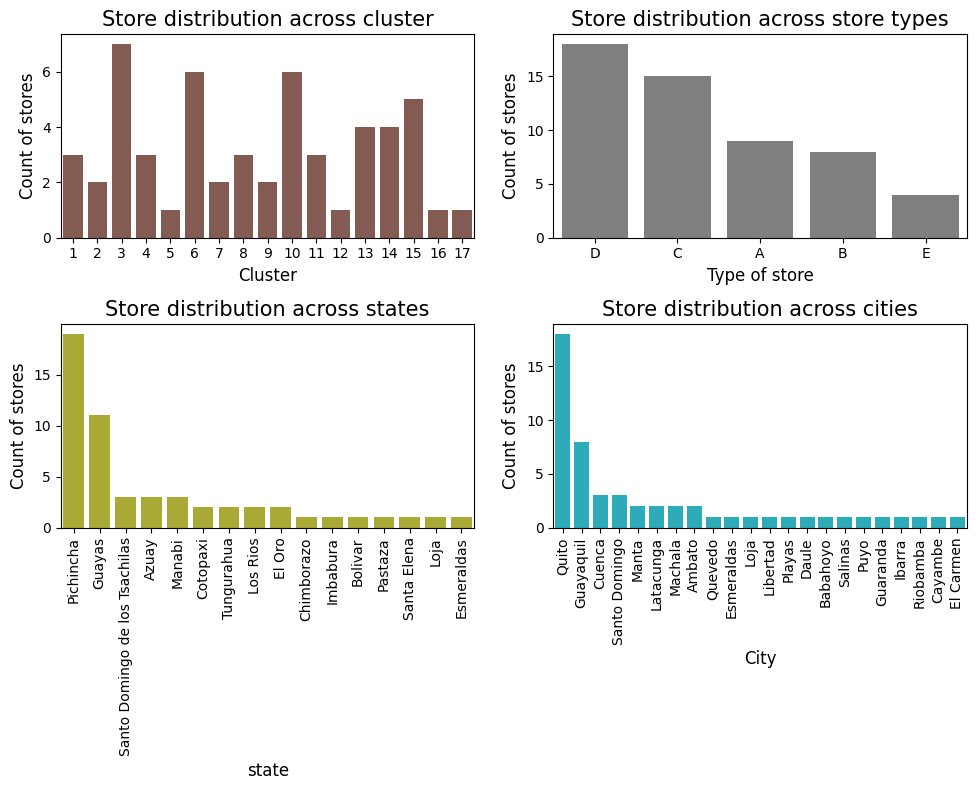

In [41]:
plt.figure(figsize=(10, 8))
plt.subplot(221)

temp = stores['cluster'].value_counts()

sns.barplot(x=temp.index, y=temp.values, color=color[5])
plt.ylabel('Count of stores', fontsize=12)
plt.xlabel('Cluster', fontsize=12)
plt.title('Store distribution across cluster', fontsize=15)

plt.subplot(222)
temp = stores['type'].value_counts()

sns.barplot(x=temp.index, y=temp.values, color=color[7])
plt.ylabel('Count of stores', fontsize=12)
plt.xlabel('Type of store', fontsize=12)
plt.title('Store distribution across store types', fontsize=15)

plt.subplot(223)

temp = stores['state'].value_counts()

sns.barplot(x=temp.index, y=temp.values, color=color[8])
plt.ylabel('Count of stores', fontsize=12)
plt.xlabel('state', fontsize=12)
plt.title('Store distribution across states', fontsize=15)
plt.xticks(rotation='vertical')

plt.subplot(224)

temp = stores['city'].value_counts()

sns.barplot(x=temp.index, y=temp.values, color=color[9])
plt.ylabel('Count of stores', fontsize=12)
plt.xlabel('City', fontsize=12)
plt.title('Store distribution across cities', fontsize=15)
plt.xticks(rotation='vertical')
plt.tight_layout()
plt.show()

In [42]:
store_items = pd.merge(sale_store_item_level, items, on='item_nbr')
store_items = pd.merge(store_items, stores, on='store_nbr')
store_items['item_sales'] = store_items['item_sales']


top_items_by_type = store_items.groupby(['type', 'item_nbr'])[
    'item_sales'].sum()
top_items_by_type = top_items_by_type.reset_index().sort_values(
    ['type', 'item_sales'], ascending=[True, False])

top_items_by_type = top_items_by_type.groupby(['type']).head(5)



top_class_by_type = store_items.groupby(['type', 'class'])['item_sales'].sum()
top_class_by_type = top_class_by_type.reset_index().sort_values(
    ['type', 'item_sales'], ascending=[True, False])

top_class_by_type = top_class_by_type.groupby(['type']).head(5)



top_family_by_type = store_items.groupby(['type', 'family'])[
    'item_sales'].sum()
top_family_by_type = top_family_by_type.reset_index().sort_values(
    ['type', 'item_sales'], ascending=[True, False])

top_family_by_type = top_family_by_type.groupby(['type']).head(5)

<Figure size 1200x500 with 0 Axes>

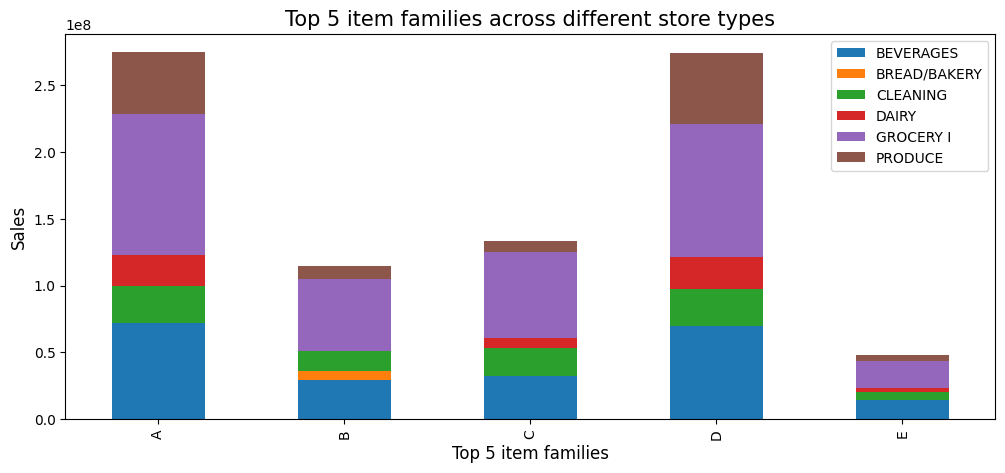

In [43]:
plt.figure(figsize=(12, 5))

x = top_family_by_type.pivot(index='type', columns='family')
x.plot.bar(stacked=True, figsize=(12, 5))
y = x.columns.droplevel(0).values
plt.ylabel('Sales', fontsize=12)
plt.xlabel('Top 5 item families', fontsize=12)
plt.title('Top 5 item families across different store types', fontsize=15)
plt.xticks(rotation='vertical')
plt.legend(y)
plt.show()

In [46]:
top_family_by_type = store_items.groupby(['type', 'family'])[
    'item_sales'].sum()
top_family_by_type = top_family_by_type.reset_index().sort_values(
    ['type', 'item_sales'], ascending=[True, False])
x = top_family_by_type.pivot(index='family', columns='type')
cm = sns.light_palette("orange", as_cmap=True)
x = x.style.background_gradient(cmap=cm)
x